# **How do people use ChatGPT?**
Let's look at some data!
Here are 817 answers to the following question from Andrew Ng on Linkedin "If you're a frequent user of ChatGPT, what are you using it for?" (retrieved on 25.04.2023)


In [1]:
#libraries I will be using
import numpy as np
import spacy
import random
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("2023_gpt_comments.csv", delimiter=';')

In [4]:
df.head(10)

,comment
0,Drawing fresh images...
1,As a friend(I vent) :DI've also started using ...
2,I'm trying to get it mad by asking absurd and ...
3,To learn the limits of an LLM
4,I often use it for instant fact checking / sea...
5,Like... everything? 😁
6,Mostly for studies. But sometimes adequate sol...
7,"To write texts with its help, most of the time..."
8,Making books at.
9,"To write codes, when I'm lazy to think."


In [5]:
# check for null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  817 non-null    object
dtypes: object(1)
memory usage: 6.5+ KB


In [6]:
df.isna().sum()

comment    0
dtype: int64

In [7]:
df.dropna(inplace=True)
#need to look for nans before converting to string if you want to use the isna() function

In [8]:
#convert to type "string" instead of "object"
df = df.astype("string")

In [9]:
df.info() # check type conversion and null value drop

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  817 non-null    string
dtypes: string(1)
memory usage: 6.5 KB


In [12]:
#!python -m spacy download en_core_web_sm

In [13]:
#start spacy
sp = spacy.load("en_core_web_sm")
#concatenate all comments into one big text object
all_text = df["comment"].str.cat(sep=" ")
#create spacy doc object that contains tokens and POS tags
doc = sp(all_text)

In [14]:
#get word frequencies and show top 20, ignore stopwords, punctuation, and whitespace, normalize to lowercase
words = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.lemma_.strip()]
word_freq = Counter(words)
most_common_lemmas = word_freq.most_common(20)
most_common_lemmas


[('code', 254),
 ('use', 175),
 ('chatgpt', 120),
 ('write', 110),
 ('ask', 93),
 ('help', 82),
 ('time', 81),
 ('learn', 76),
 ('question', 73),
 ('find', 73),
 ('idea', 70),
 ('like', 69),
 ('answer', 68),
 ('research', 58),
 ('work', 56),
 ('search', 54),
 ('good', 51),
 ('ai', 51),
 ('new', 49),
 ('generate', 46)]

In [15]:
#get relative frequencies of 20 most common words excluding stopwords
words = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.lemma_.strip()]
word_freq = Counter(words)
total_count = sum(word_freq.values())

relative_freq = [(word, count / total_count) for word, count in word_freq.most_common(20)]

print(f"Total count: {total_count}\nRelative frequencies:\n{relative_freq}")


Total count: 9234
Relative frequencies:
[('code', 0.027507039202945636), ('use', 0.018951700238249946), ('chatgpt', 0.01299545159194282), ('write', 0.011912497292614252), ('ask', 0.010071474983755685), ('help', 0.008880225254494261), ('time', 0.008771929824561403), ('learn', 0.00823045267489712), ('question', 0.00790556638509855), ('find', 0.00790556638509855), ('idea', 0.007580680095299978), ('like', 0.007472384665367121), ('answer', 0.007364089235434265), ('research', 0.006281134936105696), ('work', 0.006064544076239983), ('search', 0.005847953216374269), ('good', 0.005523066926575698), ('ai', 0.005523066926575698), ('new', 0.005306476066709985), ('generate', 0.004981589776911414)]


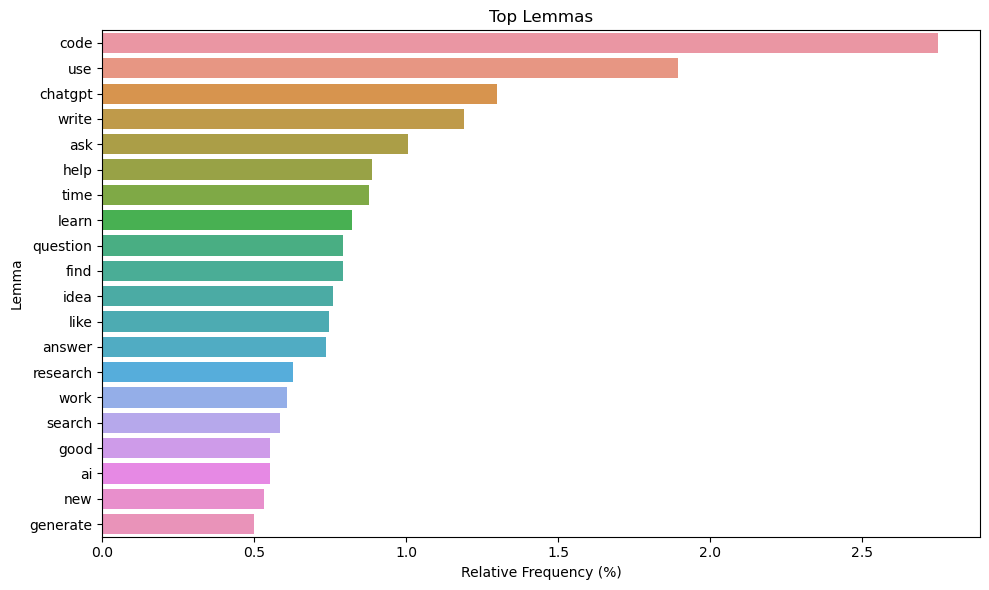

In [16]:
# Extract the words and their relative frequencies from the list of tuples
freq_words = [word for word, _ in relative_freq]
frequencies = [freq for _, freq in relative_freq]

# Convert the relative frequencies to percentages
percentages = [freq * 100 for freq in frequencies]

# Generate the chart
chart = sns.barplot(x=percentages, y=freq_words)
plt.xlabel('Relative Frequency (%)')
plt.ylabel('Lemma')
plt.title('Top Lemmas')

# Adjust figure size and layout
chart.figure.set_size_inches(10, 6)  # Set the figure size as needed
plt.tight_layout()  # Adjust spacing and margins

# Save the chart as a file
chart.figure.savefig('top_lemmas.png')


In [17]:
#get 20 most frequent nouns in contrast to 20 most frequent lemmas
# Create a Matcher pattern for nouns
matcher = spacy.matcher.Matcher(sp.vocab)
pattern = [{"POS": "NOUN", "OP": "+"}]
matcher.add("NounPhrase", [pattern])

# Extract nouns from the 'doc' object
matches = matcher(doc, as_spans=True)
nouns = []
for span in matches:
    nouns.append(span.text.lower())
    phrase_freq = Counter(nouns)
frequent_nouns = phrase_freq.most_common(20)
frequent_nouns

[('code', 144),
 ('time', 71),
 ('questions', 62),
 ('chatgpt', 62),
 ('ideas', 53),
 ('research', 48),
 ('things', 41),
 ('answers', 37),
 ('content', 35),
 ('search', 34),
 ('information', 33),
 ('text', 33),
 ('topics', 32),
 ('writing', 32),
 ('concepts', 28),
 ('learning', 27),
 ('data', 27),
 ('knowledge', 24),
 ('emails', 23),
 ('lot', 22)]

In [18]:
# Calculate the total count of nouns
#noun_freq = Counter(nouns)
total_count = sum(phrase_freq.values())

# Calculate the relative frequencies of nouns
noun_rel_freq = {noun: count / total_count for noun, count in phrase_freq.items()}

# Get the 30 most frequent nouns with their relative frequencies
most_common_nouns = phrase_freq.most_common(20)
most_common_nouns_rel_freq = [(noun, count, noun_rel_freq[noun]) for noun, count in most_common_nouns]

print(most_common_nouns_rel_freq)

[('code', 144, 0.028346456692913385), ('time', 71, 0.013976377952755905), ('questions', 62, 0.012204724409448819), ('chatgpt', 62, 0.012204724409448819), ('ideas', 53, 0.010433070866141732), ('research', 48, 0.009448818897637795), ('things', 41, 0.008070866141732283), ('answers', 37, 0.007283464566929134), ('content', 35, 0.006889763779527559), ('search', 34, 0.0066929133858267716), ('information', 33, 0.006496062992125984), ('text', 33, 0.006496062992125984), ('topics', 32, 0.006299212598425197), ('writing', 32, 0.006299212598425197), ('concepts', 28, 0.005511811023622047), ('learning', 27, 0.00531496062992126), ('data', 27, 0.00531496062992126), ('knowledge', 24, 0.004724409448818898), ('emails', 23, 0.00452755905511811), ('lot', 22, 0.004330708661417323)]


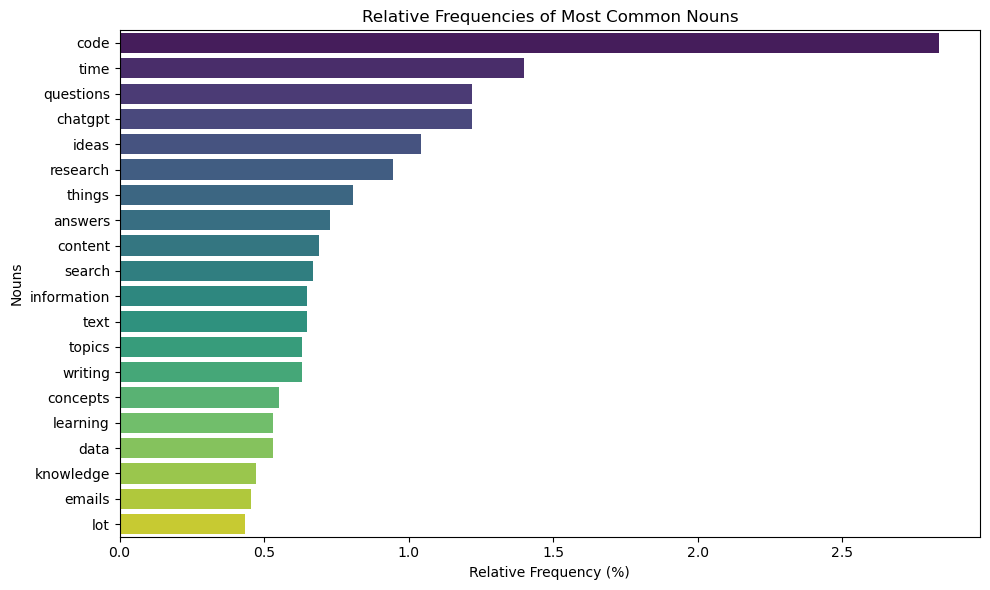

In [19]:
# Extract the nouns, counts, and relative frequencies from the list of tuples
nouns = [item[0] for item in most_common_nouns_rel_freq]
relative_frequencies = [item[2] for item in most_common_nouns_rel_freq]

# Convert relative frequencies to percentages
relative_frequencies_percent = [freq * 100 for freq in relative_frequencies]

# Create a horizontal bar plot of the relative frequencies as percentages
#sns.set(style="whitegrid")
#plt.figure(figsize=(10, 12))
chart = sns.barplot(x=relative_frequencies_percent, y=nouns, palette="viridis")
plt.title("Relative Frequencies of Most Common Nouns")
plt.xlabel("Relative Frequency (%)")
plt.ylabel("Nouns")
#plt.tight_layout()
#plt.show()

###
# Adjust figure size and layout
chart.figure.set_size_inches(10, 6)  # Set the figure size as needed
plt.tight_layout()  # Adjust spacing and margins

# Save the chart as a file
chart.figure.savefig('top_nouns.png')


The list of nouns is already looking more informative, but I want some context too
For the 8 nouns that I select as subjectivly being the most informative, lets extract them with their two
immediately preceding words and immediatly following words.

Let's save this information in a data frame.

Let's present some of it.

In [20]:
informative_nouns = ["code", "ideas", "research", "content", "search", "writing", "learning", "emails"]

In [21]:
def extract_phrases(word_list, doc):
    word_contexts = []
    for word in word_list:
        matcher = spacy.matcher.Matcher(sp.vocab)
        pattern = [
            {},
            {},
            {"LOWER": word},
            {},
            {},
        ]
        matcher.add("word_pattern", [pattern])
        # Extract matches from the 'doc' object
        matches = matcher(doc, as_spans=True)
        # Extract phrases "a lot of" + next word
        word_phrases = []
        for span in matches:
            word_phrases.append(span.text.lower()) 
        word_contexts.append(word_phrases)
    return word_contexts
    

In [22]:
my_contexts = extract_phrases(informative_nouns, doc)

In [23]:
#convert the list of lists into a df
#make all lists same length
data = {}
max_length = max(len(lst) for lst in my_contexts)
for i, column_name in enumerate(informative_nouns):
    values = my_contexts[i] + [None] * (max_length - len(my_contexts[i]))
    data[column_name] = values
df_contexts = pd.DataFrame(data)

In [24]:
df_contexts.head(10)

,code,ideas,research,content,search,writing,learning,emails
0,for source code. they,possible other ideas an theories,it for research and sample,"developing, content creation.",checking / search engine in,sometimes writing out prose,by machine learning will end,in customer emails… addresses
1,of working code that ai,get the ideas of my,"the bugs research, and","about creating content, although",", that search when we",. for writing codes+ understanding,"processes in learning, especially",to rewrite emails and documents
2,and sample code generation.,some useful ideas about demonstrations,the data+writing research paper i,and business content writing using,"than a search engine,",", improving writing style 😁",at self learning for 6,write short emails for mundane
3,of your code and also,"and forecast ideas, get","dates in research, but","-form content, but",. to search for answers,it. writing aid two,on machine learning delivered at,". emails, texts"
4,such as code or commands,blog post ideas and outlines,lot. research and comparisons,"drafting initial content, framing",like a search engine which,use for writing codes which,google searches learning how,find writing emails anxiety inducing
5,mind into code reviewing articles,", have ideas, and","in my research approach,","it for content recommendations,",what to search for.,although not writing it in,you are learning a language,official daily emails. i
6,get the code in python,a few ideas and then,to my research approach or,"planning, content generating i",unlike google search! recipes,assistence when writing unit tests,'s still learning and if,text and emails rewording and
7,write the code from the,articulate my ideas and get,impossible to research this with,of repetitive content. explaining,"my google search, stackoverflow",) after writing a difficult,in deep learning tools and,have professional emails. when
8,improve the code. i,i through ideas against it,great for research coding and,preparing lecture content ongoing project,as a search engine too,everything involves writing and thinking,up the learning process.,"write better emails, answer"
9,explain difficult code blocks in,for creative ideas. i,time in research and rewriting,to create content and edit,task to search on our,improving my writing i tried,process. learning english i,reviews writing emails 😅 the


In [ ]:
# It looks like ppl use it alot for explaining, for information search, idea generation, coding

In [ ]:
#get 30 most frequent adjective noun phrases
from spacy.matcher import Matcher

matcher = Matcher(sp.vocab)
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}]
matcher.add("ADJ_PHRASE", [pattern])

matches = matcher(doc, as_spans=True)
phrases = []
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(30)

In [ ]:
from spacy.matcher import Matcher

matcher = Matcher(sp.vocab)
# Define a pattern to match verb-preposition phrases followed by two words
#pattern = [{"POS": "VERB"}, {"POS": "ADP"}, {"POS": "NOUN"}, {"POS": "NOUN"}]
pattern = [{"POS": "VERB"}, {"POS": "ADP"}]
matcher.add("VERB_PREP_PHRASE", [pattern])

matches = matcher(doc, as_spans=True)
phrases = []
for span in matches:
    phrases.append(span.text.lower())
    phrase_freq = Counter(phrases)

phrase_freq.most_common(30)

In [ ]:
from spacy.matcher import PhraseMatcher

my_colloc = []
matcher = PhraseMatcher(sp.vocab, attr="LOWER")
# The attr above ensures all instances are converted to lower-case so the search is case-insensitive

pattern = [sp.make_doc("chat")]
matcher.add("use it for", pattern)
matches = matcher(doc)

for match_id, start, end in matches:
    span = doc[start - 10 : end + 10]
    my_colloc.extend(
        [
            token.lemma_.lower()
            for token in span
            if not token.is_punct and not token.is_stop
        ]
    )

Counter(my_colloc).most_common(20)

In [ ]:
import gensim

In [ ]:
# Load the spacy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Clean the comments by removing stop words and lemmatizing
cleaned_comments = []
for comment in df["comments"]:
    doc = nlp(comment)
    cleaned_comment = " ".join(
        [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    )
    cleaned_comments.append(cleaned_comment)


In [ ]:
# Create a gensim dictionary and corpus
dictionary = gensim.corpora.Dictionary([comment.split() for comment in cleaned_comments])
corpus = [dictionary.doc2bow(comment.split()) for comment in cleaned_comments]


In [ ]:
# Train the LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus, id2word=dictionary, num_topics=3, random_state=42
)

In [ ]:
# Print the topics and their top words
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {}\nWords: {}".format(idx, topic))